# Modèle linéaire

Considérons la cas classique d'une fonction affine :

$$y=ax+b$$

Ici, $a$ et $b$ sont des réels. Ces deux nombres définissent entièrement la courbe et permet donc d'obtenir une relation **affine** entre $x$ et $y$. En statistique, cette relation est à la base des modèles dit **linéaires**, où une variable réponse se définit comme une somme de variables explicatives où chacune de ces dernières sont multipliés par un coefficient.


## Modèle linéaire simple

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/438px-Linear_regression.svg.png)

Dans le modèle linéaire simple (une seule variable explicative), on suppose que la variable réponse suit le modèle suivant :

$$y_i=\beta_0 + \beta_1 x_i + \varepsilon_i$$

On remarque la ressemblance avec la fonction affine présentée ci-dessus. La différence réside dans l'existence du terme aléatoire (appelé bruit) $\varepsilon_i$. Afin de considérer le modèle, il est nécessaire de se placer sous les hypothèses suivantes

$$(\mathcal{H}) : \left\{\begin{matrix}
\mathbb{E}[\varepsilon_i]=0\\ 
\text{Cov}(\varepsilon_i, \varepsilon_j)=\delta_{ij} \sigma^2
\end{matrix}\right.$$
Les différents éléments qui interviennent sont :

- $\beta_0$ : l'ordonnée à l'origine (nommée *intercept*)
- $\beta_1$ : le coefficient directeur
- $x_i$ : l'observation $i$
- $y_i$ : le $i$-ème prix
- $\varepsilon_i$ : le bruit aléatoire liée à la $i$-ème observation

La solution peut se calculer facilement via les formules fermées suivantes :

$$\hat{\beta}_1=\frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2} \qquad \hat{\beta}_0 = \hat{y} - \hat{\beta}_1 \bar{x}$$

## Modèle linéaire multiple

Dans le cas multiple (pour $p$ variables explicatives), pour la $i$-ème observation, le modèle s'écrit :

$$y_i= \beta_0 + \sum_{j=1}^p \beta_j x_{ij} + \varepsilon_i$$

Ainsi, une observation $x_i$ n'est plus une valeur, mais un **vecteur** $(x_{i1}, \dots, x_{ip})$. Il est plus commode de regrouper ces prix $y_i$ et ces vecteurs d'observations $x_i$ dans des matrices :

$$Y=X \beta + \varepsilon$$

Sous les hypothèses équivalentes du modèle simple en plus grand dimension

$$(\mathcal{H}) : \left\{\begin{matrix}
\text{rank}(X)=p\\ 
\mathbb{E}[\varepsilon]=0 \text{ et }\text{Var}(\varepsilon)=\sigma^2 I_p
\end{matrix}\right.$$

Les différents éléments qui interviennent sont :

- $\beta$ : le vecteur directeur
- $X$ : la matrice des observations
- $Y$ : le vecteur de prix
- $\varepsilon$ : le vecteur de bruit

Avec $X=( \mathbf{1}, X_1, \dots, X_n)$, $Y=(y_1, \dots, y_n)^\top$ et $\varepsilon=(\varepsilon_1, \dots, \varepsilon_n)^\top$. La solution des MCO (Moindres Carrés Ordinaires) est alors :

$$\hat{\beta}= (X^\top X)^{-1} X^\top Y$$

Vous pouvez d'ailleurs faire la démonstration de votre coté ! Pour plus d'information mathématiques, je vous conseil le portail de wikipédia qui est très bien fait : [lien ici](https://fr.wikipedia.org/wiki/Portail:Probabilit%C3%A9s_et_statistiques)

# Implémenter une régression linéaire 


In [36]:
#importer vos librairies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline £

UsageError: unrecognized arguments: £


In [6]:
#charger les données 
#price_availability.csv
#listings_final.csv
#attention l'individu 589 n'a pas de prix !!
prices = pd.read_csv("price_availability.csv", sep=";")
listings = pd.read_csv("listings_final.csv", sep=";")
listings = listings.drop(589)  
print("Chargement des données effectué.")

Chargement des données effectué.


In [7]:
listings.head()

,Unnamed: 0,listing_id,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,0,28581061,La maison Clery,private_room,Paris,2e arrondissement,48.869292,2.348335,1,1,1,2.0,False,True,True,False,False,1.00,1.00
1,1,661961,studio PARIS PLACE EDITH PIAF 75020,entire_home,Paris,NaN,48.867284,2.403255,2,1,1,1.0,False,False,True,True,False,0.88,0.69
2,2,1261705,chambre privée à louer @ paris oberkampf,private_room,Paris,NaN,48.867894,2.375897,1,1,1,1.0,False,False,True,True,False,1.00,1.00
3,3,1318834,Appartement au coeur du Marais,entire_home,Paris,République,48.870370,2.358510,3,2,2,1.0,False,False,True,False,False,0.82,0.48
4,4,1677091,Lovely & Quiet flat,entire_home,Paris,Buttes-Chaumont - Belleville,48.874149,2.373700,2,1,1,1.0,False,False,True,True,False,0.95,0.90


In [8]:
prices.head()

,listing_id,day,created,available,local_currency,local_price,min_nights
0,9810829,2018-12-08,2018-09-27 06:14:10.000+0000,True,EUR,160,1
1,9810829,2018-12-08,2018-09-26 19:34:02.000+0000,True,EUR,160,1
2,20897010,2018-12-09,2018-09-27 10:38:57.000+0000,True,EUR,172,2
3,20897010,2018-12-09,2018-09-27 06:10:27.000+0000,True,EUR,172,2
4,20897010,2018-12-09,2018-09-26 19:30:25.000+0000,True,EUR,172,2


## Données d'entrée

L'objectif ici est de charger les données pour créer les matrices $X$ et $Y$ du modèle linéaire. **Attention**, il n'est pas nécessaire de rajouter le vecteur colonne $\mathbf{1}$ en première colonne, car *scikit-learn* le fait automatiquement !

In [86]:
#définir 2 variables de travail
#X := les features à utiliser 
#Y := la target (prix)
X = listings.loc[:, ["listing_id", "type", "person_capacity", "bedrooms", "is_fully_refundable", "is_rebookable","bathrooms","is_host_highly_rated" ]]
Y = []

In [87]:
#construire l'ensemble de donnée prix 
for i, row in X.iterrows():
    y = 0
    ID = int(row["listing_id"])
    subset = prices[prices["listing_id"] == ID]
    y = subset["local_price"].mean()
    Y.append(y)

#Ne pas oublier de convertir Y en objet numpy 
Y = np.asarray(Y)

In [88]:
Y.shape

(999,)

In [90]:
X['cible'] = Y
X.describe()

,listing_id,person_capacity,bedrooms,bathrooms,cible
count,9.990000e+02,999.000000,999.000000,999.000000,999.000000
mean,1.543276e+07,3.669670,1.326326,1.230230,189.304613
std,9.305853e+06,2.190568,0.998806,0.524497,184.425492
min,5.609300e+04,1.000000,0.000000,0.000000,17.863724
25%,6.341818e+06,2.000000,1.000000,1.000000,76.525248
50%,1.727835e+07,3.000000,1.000000,1.000000,144.000000
75%,2.378911e+07,4.000000,2.000000,1.000000,230.372596
max,2.879280e+07,16.000000,6.000000,5.000000,1780.590674


In [94]:
from sklearn.preprocessing import LabelEncoder

type_encoder, refundable_encoder, rebookable_encoder, rated_encoder = LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder()
X.type=type_encoder.fit_transform(X.type)
X.refundable=refundable_encoder.fit_transform(X.is_fully_refundable)
X.rebookable=rebookable_encoder.fit_transform(X.is_rebookable)
X.rated=rated_encoder.fit_transform(X.is_host_highly_rated	)

X = X.drop('cible', axis=1).drop('listing_id',axis=1)
X

/var/folders/fn/1lbn3r017dg11gg5mnymslth0000gn/T/ipykernel_69380/4178274540.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.refundable=refundable_encoder.fit_transform(X.is_fully_refundable)
/var/folders/fn/1lbn3r017dg11gg5mnymslth0000gn/T/ipykernel_69380/4178274540.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.rebookable=rebookable_encoder.fit_transform(X.is_rebookable)
/var/folders/fn/1lbn3r017dg11gg5mnymslth0000gn/T/ipykernel_69380/4178274540.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.rated=rated_encoder.fit_transform(X.is_host_highly_rated	)


,type,person_capacity,bedrooms,is_fully_refundable,is_rebookable,bathrooms,is_host_highly_rated
0,1,1,1,True,False,2.0,False
1,0,2,1,True,False,1.0,True
2,1,1,1,True,False,1.0,True
3,0,3,2,True,False,1.0,False
4,0,2,1,True,False,1.0,True
...,...,...,...,...,...,...,...
995,0,2,0,True,False,1.0,False
996,0,3,1,True,False,1.0,False
997,0,4,1,True,False,1.0,True
998,0,6,2,True,False,1.5,False


En *Machine Learning*, on a l'habitude de couper l'ensemble de données en deux sous-ensembles :

- Un ensemble d'entraînement (*train set*), sur lequel le modèle va être calibré.
- Un ensemble de test (*test set*), qui ne sera pas utilisé pendant le calibrage mais permettra de vérifier l'aptitude du modèle à généraliser sur de nouvelles observations inconnues.

En général, on découpe l'ensemble de données (*split*) en prenant $\alpha \%$ de l'ensemble pour entraînement et $1-\alpha \%$ comme test. Dans la plus part des cas, on considère que $\alpha=10,20 ou 30\%$.

In [95]:
#utiliser la méthode split de sklearn en splitant avec un alpha=30 et un random state=42 
#zafficher la shape de vos données 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((699, 7), (699,), (300, 7), (300,))

## Entraînement

Pour information, *scikit-learn* utilise le solveur OLS (Ordinary Least Squares) de *numpy*.

In [96]:
from sklearn import linear_model #modèle linéaire
#créer l'objet de régression et entrainé le sur notre ensemble d'entraînement
regr = linear_model.LinearRegression()
regr.fit(X_train.values, y_train)

LinearRegression()

On affiche le vecteur des coefficients pour interpréter rapidement le modèle.

In [97]:
X.head(1)

,type,person_capacity,bedrooms,is_fully_refundable,is_rebookable,bathrooms,is_host_highly_rated
0,1,1,1,True,False,2.0,False


In [98]:
#afficher les coefficients
#que remarquez vous ? 
print('Coefficients beta_j : \n', regr.coef_)
print('Coefficients INTERCEPT beta_0 : \n', regr.intercept_)

Coefficients beta_j : 
 [ 5.86808387e+01  3.61025212e+01  4.64525665e+00 -1.04271888e+02
  2.84217094e-14  8.46525205e+01 -3.33459646e+00]
Coefficients INTERCEPT beta_0 : 
 43.45210344232305


## Validation du modèle

### Coefficient de détermination $R^2$

Par la suite, nous ferons l'hypothèse de gaussianité sur les bruits. Dans l'idée, nous aimerions obtenir une valeur numérique qui nous indique à quel point la régression linéaire a un sens sur nos données. Pour cela, introduisons les notations suivantes :

- $SCT=\|Y-\hat{y} \mathbf{1}\|^2$ est la somme des carrés totaux
- $SCE=\|\hat{Y}-\hat{y} \mathbf{1}\|^2$ est la somme des carrés expliqués
- $SCR=\|\hat{\varepsilon}\|^2$ est la somme des carrés résiduels

L'idée est de décomposer la somme des carrés totaux comme la somme des carrés que le modèle explique, en plus de la somme des carrés qui sont liés aux résidus (et donc que le modèle ne peut pas expliquer). On voit donc ici l'intérêt de calculer un coefficient à partir du $SCE$. Puisque l'on a la relation suivante :

$$SCT=SCE+SCR \text{ alors } 1=\frac{SCE}{SCT}+\frac{SCR}{SCT}$$

Plus les résidus sont petits (et donc la régression est "bonne"), plus $SCR$ devient petit et donc $SCE$ devient grand. Le schéma inverse s'opère de la même façon. Dans le meilleur des cas, on obtient $SCR=0$ et donc $SCE=SCT$ d'où le premier membre vaut $1$. Dans le cas contraite, $SCE=0$ et automatiquement, le premier membre est nul. C'est ainsi que l'on définit le coefficient de détermination $R^2$ comme 
$$R^2=\frac{SCE}{SCT}=1-\frac{SCR}{SCT}$$
Ainsi, $R^2 \in [0,1]$. Plus $R^2$ est proche de $1$, plus la régression linéaire a du sens. Au contraire, si $R^2$ est proche de $0$, le modèle linéaire possède un faible pouvoir explicatif.

In [99]:
from sklearn.metrics import mean_squared_error, r2_score #métriques d'évaluation

In [100]:
#y_pred = regr.predict(X_test.values)
print(regr.score(X_test.values,y_test))
print('Variance score: %.2f' % r2_score(y_test, Y_pred))
#y_pred = regr.predict(X_test.values)
print(regr.score(X_train.values,y_train))
print('Variance score: %.2f' % r2_score(y_train, regr.predict(X_train.values)))

0.3997891275962002
Variance score: 0.40
0.36127148590932145
Variance score: 0.36


In [101]:
#afficher l'erreur des moindres carrées sur l'ensemble d'entrainement 
print("Mean squared error: %.2f"
      % mean_squared_error(y_train, regr.predict(X_train.values)))
#afficher l'erreur des moindres carrées sur l'ensemble de test
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, regr.predict(X_test.values)))

Mean squared error: 21717.39
Mean squared error: 20355.29


In [102]:
print(np.sqrt(21717.39))
np.sqrt(20355.29)

147.36821231188225


142.67196641246662

In [103]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, regr.predict(X_test.values))
mae

83.0753586549405

In [92]:
X_test['prediction'] = regr.predict(X_test.values)
X_test['cible']  = y_test
X_test

,type,person_capacity,bedrooms,is_fully_refundable,is_rebookable,bathrooms,is_host_highly_rated,prediction,cible
453,1,2,1,True,False,1.0,True,156.029278,79.810390
794,1,2,1,True,False,1.0,False,159.363874,125.000000
209,0,2,0,True,False,1.0,True,92.703182,95.453333
309,2,1,1,True,False,1.0,False,181.942192,29.000000
741,0,5,2,True,False,1.0,True,210.301259,82.588391
...,...,...,...,...,...,...,...,...,...
314,0,8,3,True,False,2.5,True,450.232860,718.092784
404,0,7,3,True,False,2.0,True,371.804079,517.996183
7,0,2,1,True,False,1.0,True,97.348439,213.324607
155,0,2,0,True,False,1.0,False,96.037779,79.000000


## Bonus : Analyse de l'homoscédasticité

L'analyse de l'homoscédasticité est primordiale : c'est en particulier elle qui nous permet de vérifier, à partir des résidus, si les bruits vérifient bien l'hypothèse $(\mathcal{H})$. On calcule donc les **résidus studentisés**.

$$t_i^*=\frac{\hat{\varepsilon}_i}{\hat{\sigma}_{(i)} \sqrt{1-h_{ii}}}$$
Avec $h_{ii}=\{X(X^\top X)^{-1} X^\top\}_{ii}=H_{ii}$ la matrice de projection sur l'hyperplan des variables. Plus précisément, $H$ est la matrice qui projette $Y$ sur l'espace engendré par les variables, soit $\hat{Y}=HY$. De même, on considère $\hat{\sigma}_{(i)}$ l'estimateur de la variance du bruit en supprimant l'observation $i$ (par une méthode de validation croisée Leave-One-Out que nous ne détaillerons pas ici).

Dans ce cas, on peut montrer que les résidus studentisés suivent une loi de Student à $n-p-1$ degrés de liberté.

In [18]:
H = np.matmul(X_train.values, np.linalg.solve(np.dot(X_train.T.values, X_train.values), X_train.T.values))


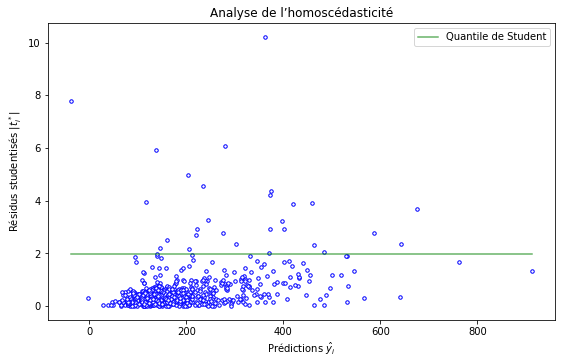

In [19]:
import scipy
Y_pred = regr.predict(X_train)
n = X_train.shape[0]
p = 4
residuals = np.abs(y_train - Y_pred)
H = np.matmul(X_train.values, np.linalg.solve(np.dot(X_train.T.values, X_train.values), X_train.T.values))
std_hat = np.dot(residuals, residuals) / (n - p)
standart_residuals = np.asarray([residuals[i] / np.sqrt(std_hat * (1 - H[i, i])) for i in range(len(residuals))])
student_residuals = np.asarray([ standart_residuals[i] * np.sqrt((n - p - 1) / (n - p - standart_residuals[i]**2)) for i in range(n) ])
cook = np.asarray([ H[i, i] * student_residuals[i] / (X_train.shape[1] * (1 - H[i, i])) for i in range(n) ])

plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.scatter(Y_pred, student_residuals, s=12, c="white", edgecolors="blue")
plt.plot([min(Y_pred), max(Y_pred)], [ scipy.stats.t.ppf(q=0.975, df=n-p-1), scipy.stats.t.ppf(q=0.975, df=n-p-1)], color="green", alpha=0.6, label="Quantile de Student")
plt.title("Analyse de l’homoscédasticité")
plt.xlabel("Prédictions $\hat{y}_i$")
plt.ylabel("Résidus studentisés $|t_i^*|$")
plt.legend()

In [106]:
X_test

,type,person_capacity,bedrooms,is_fully_refundable,is_rebookable,bathrooms,is_host_highly_rated
453,1,2,1,True,False,1.0,True
794,1,2,1,True,False,1.0,False
209,0,2,0,True,False,1.0,True
309,2,1,1,True,False,1.0,False
741,0,5,2,True,False,1.0,True
...,...,...,...,...,...,...,...
314,0,8,3,True,False,2.5,True
404,0,7,3,True,False,2.0,True
7,0,2,1,True,False,1.0,True
155,0,2,0,True,False,1.0,False


In [108]:
new_row = {'type':2, 'person_capacity':2, 'bedrooms':'1', 'is_fully_refundable':True, 'is_rebookable':False, 'bathrooms':1.0, 'is_host_highly_rated':True }
X_test = X_test.append(new_row, ignore_index=True)

/var/folders/fn/1lbn3r017dg11gg5mnymslth0000gn/T/ipykernel_69380/1521892749.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_test = X_test.append(new_row, ignore_index=True)


In [113]:
X_test[300:].values

array([[2, 2, '1', True, False, 1.0, True]], dtype=object)

In [115]:
regr.predict(X_test[300:].values)

array([214.71011632])